In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time

data = pd.read_csv('dataset.csv', converters={"lemmas": lambda x: x.strip("[]").replace("'", "").split(", ")})

data

CPU times: user 2.86 s, sys: 516 ms, total: 3.38 s
Wall time: 3.86 s


label                                              Текст  \
0      Происшествия  ТАСС, 10 августа. Военнослужащие группировки М...   
1      Происшествия  КРАСНОЯРСК, 10 августа. /ТАСС/. Взрывы на воен...   
2      Происшествия  ТАСС, 11 августа. Число эвакуированных из-за в...   
3      Происшествия  ТАСС, 11 августа. Не менее 147 человек погибли...   
4      Происшествия  МОСКВА, 11 августа. /ТАСС/. Следственный комит...   
...             ...                                                ...   
23995         Спорт  МОСКВА, 17 июля. /ТАСС/. Петербургский "Зенит"...   
23996         Спорт  МОСКВА, 17 июля. /ТАСС/. Испанский футбольный ...   
23997         Спорт  ТАСС, 17 июля. Австралиец Калеб Юэн, выступающ...   
23998         Спорт  СОЧИ, 17 июля. /ТАСС/. Задачей-максимум на нын...   
23999         Спорт  ТАСС, 17 июля. Грузинская "Чихура" дома обыгра...   

                                                  lemmas  
0      [тасс, август, военнослужащий, группировка, ми...  
1      [красноярск, август, тасс, взрыв, военный, скл...  
2      [тасс, август, число, эвакуировать, вспыхнуть,...  
3      [тасс, август, менее, человек, погибнуть, резу...  
4      [москва, август, тасс, следственный, комитет, ...  
...                                                  ...  
23995  [москва, июль, тасс, петербургский, зенит, нам...  
23996  [москва, июль, тасс, испанский, футбольный, кл...  
23997  [тасс, июль, австралиец, калеб, юэн, выступать...  
23998  [сочи, июль, тасс, нынешний, сезон, сочи, кото...  
23999  [тасс, июль, грузинский, чихур, дом, обыграть,...  

[24000 rows x 3 columns]

In [3]:
lemmas_str = data['lemmas'].apply(' '.join)
data['lemmas_str'] = lemmas_str
data

label                                              Текст  \
0      Происшествия  ТАСС, 10 августа. Военнослужащие группировки М...   
1      Происшествия  КРАСНОЯРСК, 10 августа. /ТАСС/. Взрывы на воен...   
2      Происшествия  ТАСС, 11 августа. Число эвакуированных из-за в...   
3      Происшествия  ТАСС, 11 августа. Не менее 147 человек погибли...   
4      Происшествия  МОСКВА, 11 августа. /ТАСС/. Следственный комит...   
...             ...                                                ...   
23995         Спорт  МОСКВА, 17 июля. /ТАСС/. Петербургский "Зенит"...   
23996         Спорт  МОСКВА, 17 июля. /ТАСС/. Испанский футбольный ...   
23997         Спорт  ТАСС, 17 июля. Австралиец Калеб Юэн, выступающ...   
23998         Спорт  СОЧИ, 17 июля. /ТАСС/. Задачей-максимум на нын...   
23999         Спорт  ТАСС, 17 июля. Грузинская "Чихура" дома обыгра...   

                                                  lemmas  \
0      [тасс, август, военнослужащий, группировка, ми...   
1      [красноярск, август, тасс, взрыв, военный, скл...   
2      [тасс, август, число, эвакуировать, вспыхнуть,...   
3      [тасс, август, менее, человек, погибнуть, резу...   
4      [москва, август, тасс, следственный, комитет, ...   
...                                                  ...   
23995  [москва, июль, тасс, петербургский, зенит, нам...   
23996  [москва, июль, тасс, испанский, футбольный, кл...   
23997  [тасс, июль, австралиец, калеб, юэн, выступать...   
23998  [сочи, июль, тасс, нынешний, сезон, сочи, кото...   
23999  [тасс, июль, грузинский, чихур, дом, обыграть,...   

                                              lemmas_str  
0      тасс август военнослужащий группировка минобор...  
1      красноярск август тасс взрыв военный склад ачи...  
2      тасс август число эвакуировать вспыхнуть авгус...  
3      тасс август менее человек погибнуть результат ...  
4      москва август тасс следственный комитет рф зад...  
...                                                  ...  
23995  москва июль тасс петербургский зенит намеренны...  
23996  москва июль тасс испанский футбольный клуб атл...  
23997  тасс июль австралиец калеб юэн выступать коман...  
23998  сочи июль тасс нынешний сезон сочи который вый...  
23999  тасс июль грузинский чихур дом обыграть люксем...  

[24000 rows x 4 columns]

In [4]:
def add_encode_variable(dtf, column):
    dtf[column+"_id"] = dtf[column].factorize(sort=True)[0]
    dic_class_mapping = dict( dtf[[column+"_id",column]].drop_duplicates().sort_values(column+"_id").values )
    return dtf, dic_class_mapping

In [5]:
data, dic_y_mapping = add_encode_variable(data, "label")

print(dic_y_mapping)
data[["label","label_id"]].sample(5)

{0: 'Армия и ОПК', 1: 'Интервью', 2: 'Космос', 3: 'Культура', 4: 'Наука', 5: 'Национальные проекты', 6: 'Недвижимость', 7: 'Общество', 8: 'Политика', 9: 'Происшествия', 10: 'Спорт', 11: 'Экономика'}


label  label_id
2221          Наука         4
17837      Политика         8
6491    Армия и ОПК         0
8897   Недвижимость         6
15489      Культура         3

In [6]:
data

label                                              Текст  \
0      Происшествия  ТАСС, 10 августа. Военнослужащие группировки М...   
1      Происшествия  КРАСНОЯРСК, 10 августа. /ТАСС/. Взрывы на воен...   
2      Происшествия  ТАСС, 11 августа. Число эвакуированных из-за в...   
3      Происшествия  ТАСС, 11 августа. Не менее 147 человек погибли...   
4      Происшествия  МОСКВА, 11 августа. /ТАСС/. Следственный комит...   
...             ...                                                ...   
23995         Спорт  МОСКВА, 17 июля. /ТАСС/. Петербургский "Зенит"...   
23996         Спорт  МОСКВА, 17 июля. /ТАСС/. Испанский футбольный ...   
23997         Спорт  ТАСС, 17 июля. Австралиец Калеб Юэн, выступающ...   
23998         Спорт  СОЧИ, 17 июля. /ТАСС/. Задачей-максимум на нын...   
23999         Спорт  ТАСС, 17 июля. Грузинская "Чихура" дома обыгра...   

                                                  lemmas  \
0      [тасс, август, военнослужащий, группировка, ми...   
1      [красноярск, август, тасс, взрыв, военный, скл...   
2      [тасс, август, число, эвакуировать, вспыхнуть,...   
3      [тасс, август, менее, человек, погибнуть, резу...   
4      [москва, август, тасс, следственный, комитет, ...   
...                                                  ...   
23995  [москва, июль, тасс, петербургский, зенит, нам...   
23996  [москва, июль, тасс, испанский, футбольный, кл...   
23997  [тасс, июль, австралиец, калеб, юэн, выступать...   
23998  [сочи, июль, тасс, нынешний, сезон, сочи, кото...   
23999  [тасс, июль, грузинский, чихур, дом, обыграть,...   

                                              lemmas_str  label_id  
0      тасс август военнослужащий группировка минобор...         9  
1      красноярск август тасс взрыв военный склад ачи...         9  
2      тасс август число эвакуировать вспыхнуть авгус...         9  
3      тасс август менее человек погибнуть результат ...         9  
4      москва август тасс следственный комитет рф зад...         9  
...                                                  ...       ...  
23995  москва июль тасс петербургский зенит намеренны...        10  
23996  москва июль тасс испанский футбольный клуб атл...        10  
23997  тасс июль австралиец калеб юэн выступать коман...        10  
23998  сочи июль тасс нынешний сезон сочи который вый...        10  
23999  тасс июль грузинский чихур дом обыграть люксем...        10  

[24000 rows x 5 columns]

In [7]:
df = data.copy()

In [8]:
labels = df['label_id'].to_list()
labels

[9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,


In [9]:
data = df['lemmas_str'].to_list()
data

['тасс август военнослужащий группировка минобороны россия ликвидация последствие паводковый завершить выполнение задача тулунский район иркутский область сообщить журналист военный ведомство город тулун состояться торжественный церемония награждение военнослужащий группировка минобороны россия принимать участие ликвидация последствие паводок тулунский район иркутский область сообщить минобороны nкак сообщить минобороны военный железнодорожник механизировать батальон железнодорожный соединение центральный военный округ цво восстановить участок береговой защитный дамба река ия город тулун восстановление около километр береговой защитный дамба район мост федеральный трасса военный специалист отсыпать около тыс кубический метр скальный грунт ширина защитный вал увеличить метр высота метр сообщить военный ведомство nвсего время работа группировка минобороны очистить завал га территория тулун разобрать разрушить паводок дом nпо информация военный ведомство губернатор иркутский область серге

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2)

In [16]:
from keras import backend as K


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

SENTENCE_LENGTH = 26
NUM = 100000

def get_sequences(tokenizer, x):
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=SENTENCE_LENGTH)

tokenizer = Tokenizer(num_words=NUM)
tokenizer.fit_on_texts(x_train)

x_train_seq = get_sequences(tokenizer, x_train)
x_test_seq = get_sequences(tokenizer, x_test)

In [20]:
from gensim.models import Word2Vec
# Загружаем обученную модель
w2v_model = Word2Vec.load('word2vec.model')
DIM = w2v_model.vector_size 
# Инициализируем матрицу embedding слоя нулями
embedding_matrix = np.zeros((NUM, DIM))
# Добавляем NUM=100000 наиболее часто встречающихся слов из обучающей выборки в embedding слой
for word, i in tokenizer.word_index.items():
    if i >= NUM:
        break
    if word in w2v_model.wv.vocab.keys():
        embedding_matrix[i] = w2v_model.wv[word]

In [21]:
from keras.layers import Input
from keras.layers.embeddings import Embedding

tweet_input = Input(shape=(SENTENCE_LENGTH,), dtype='int32')
tweet_encoder = Embedding(NUM, DIM, input_length=SENTENCE_LENGTH,
                          weights=[embedding_matrix], trainable=False)(tweet_input)

In [22]:
from keras import optimizers
from keras.layers import Dense, concatenate, Activation, Dropout
from keras.models import Model
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import GlobalMaxPooling1D

branches = []
x = Dropout(0.2)(tweet_encoder)

for size, filters_count in [(2, 10), (3, 10), (4, 10), (5, 10)]:
    for i in range(filters_count):
        branch = Conv1D(filters=1, kernel_size=size, padding='valid', activation='relu')(x)
        branch = GlobalMaxPooling1D()(branch)
        branches.append(branch)

x = concatenate(branches, axis=1)
x = Dropout(0.2)(x)
x = Dense(30, activation='relu')(x)
x = Dense(1)(x)
output = Activation('sigmoid')(x)

model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision, recall, f1])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 26)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 26, 300)      30000000    input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 26, 300)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 25, 1)        601         dropout[0][0]                    
______________________________________________________________________________________________

In [26]:
y_train_1 = np.asarray(y_train, dtype=np.int)
len(y_train_1)

19200

In [29]:
x_train_seq

array([[  775,   736,    85, ...,   288, 10489,  7397],
       [ 2449,   159,   507, ...,  1090,  1035,   274],
       [    2,  1010,   341, ...,  7889,   320,  8901],
       ...,
       [ 3711,    51,   279, ...,   350,   143,  1549],
       [    0,     0,     0, ...,   879,  1315, 29595],
       [  479,  1011,   348, ...,   435,  1453,  6592]], dtype=int32)

In [24]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("models/cnn/cnn-frozen-embeddings-{epoch:02d}-{val_f1:.2f}.hdf5", 
                             monitor='val_f1', save_best_only=True, mode='max', period=1)
history = model.fit(x_train_seq, y_train_1, batch_size=32, epochs=10, validation_split=0.25, callbacks = [checkpoint])

Epoch 1/10
450/450 [==============================] - 23s 44ms/step - loss: -2411.8851 - precision: 0.9165 - recall: 0.9989 - f1: 0.9551 - val_loss: -39254.3477 - val_precision: 0.9131 - val_recall: 1.0000 - val_f1: 0.9538
Epoch 2/10
450/450 [==============================] - 19s 41ms/step - loss: -88057.0438 - precision: 0.9144 - recall: 1.0000 - f1: 0.9546 - val_loss: -316266.0625 - val_precision: 0.9131 - val_recall: 1.0000 - val_f1: 0.9538
Epoch 3/10
450/450 [==============================] - 19s 42ms/step - loss: -474341.2932 - precision: 0.9126 - recall: 1.0000 - f1: 0.9536 - val_loss: -1034181.2500 - val_precision: 0.9131 - val_recall: 1.0000 - val_f1: 0.9538
Epoch 4/10
450/450 [==============================] - 19s 42ms/step - loss: -1361473.0657 - precision: 0.9179 - recall: 1.0000 - f1: 0.9564 - val_loss: -2308929.5000 - val_precision: 0.9131 - val_recall: 1.0000 - val_f1: 0.9538
Epoch 5/10
450/450 [==============================] - 19s 42ms/step - loss: -2876583.0685 - preci

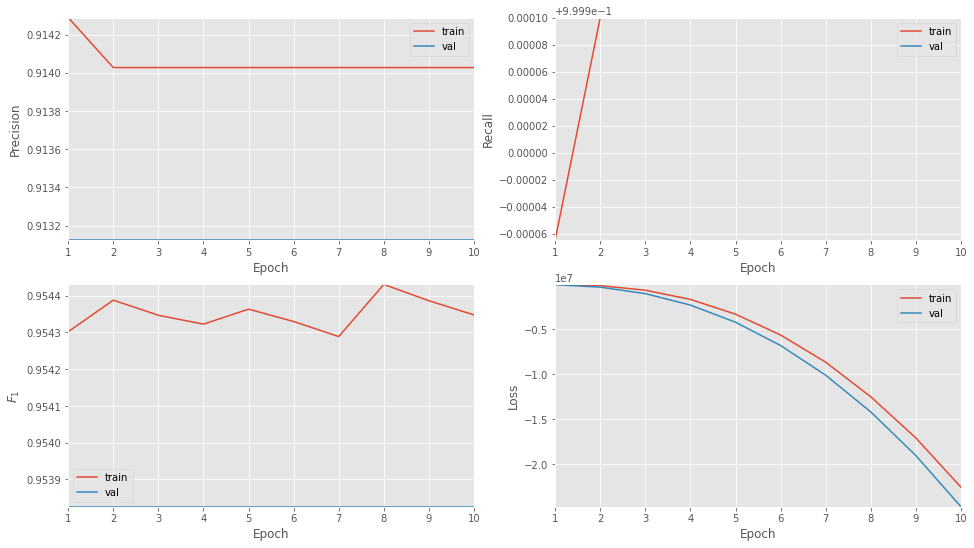

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


def plot_metrix(ax, x1, x2, title):
    ax.plot(range(1, len(x1) + 1), x1, label='train')
    ax.plot(range(1, len(x2) + 1), x2, label='val')
    ax.set_ylabel(title)
    ax.set_xlabel('Epoch')
    ax.legend()
    ax.margins(0)


def plot_history(history):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))
    ax1, ax2, ax3, ax4 = axes.ravel()

    plot_metrix(ax1, history.history['precision'], history.history['val_precision'], 'Precision')
    plot_metrix(ax2, history.history['recall'], history.history['val_recall'], 'Recall')
    plot_metrix(ax3, history.history['f1'], history.history['val_f1'], "$F_1$")
    plot_metrix(ax4, history.history['loss'], history.history['val_loss'], 'Loss')

    plt.show()


plot_history(history)

In [30]:
model.load_weights('models/cnn/cnn-frozen-embeddings-09-0.77.hdf5')

OSError: Unable to open file (unable to open file: name = 'models/cnn/cnn-frozen-embeddings-09-0.77.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [31]:
from sklearn.metrics import classification_report

predicted = np.round(model.predict(x_test_seq))
print(classification_report(y_test, predicted, digits=5))

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       345
           1    0.08604   1.00000   0.15845       413
           2    0.00000   0.00000   0.00000       390
           3    0.00000   0.00000   0.00000       396
           4    0.00000   0.00000   0.00000       434
           5    0.00000   0.00000   0.00000       419
           6    0.00000   0.00000   0.00000       399
           7    0.00000   0.00000   0.00000       390
           8    0.00000   0.00000   0.00000       416
           9    0.00000   0.00000   0.00000       392
          10    0.00000   0.00000   0.00000       391
          11    0.00000   0.00000   0.00000       415

    accuracy                        0.08604      4800
   macro avg    0.00717   0.08333   0.01320      4800
weighted avg    0.00740   0.08604   0.01363      4800



/home/capybarralt/Projects/jupyter_source/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/capybarralt/Projects/jupyter_source/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/capybarralt/Projects/jupyter_source/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av